In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
apple_df = pd.read_csv("../datasets/AAPL.csv")

In [4]:
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [6]:
apple_high_unproc = apple_df.iloc[:, 2:3].values

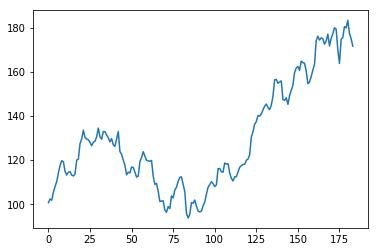

In [8]:
plt.plot(apple_high_unproc)

In [10]:
print("max", apple_high_unproc.max())
print("min", apple_high_unproc.min())

max 183.5
min 93.769997


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
apple_high_proc = scaler.fit_transform(apple_high_unproc)

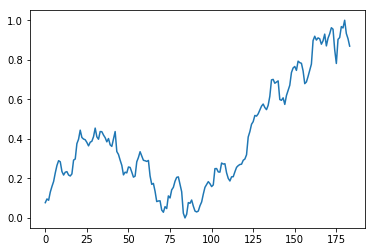

In [17]:
plt.plot(apple_high_proc)

In [18]:
print("max", apple_high_proc.max())
print("min", apple_high_proc.min())

max 1.0
min 0.0


In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
generator = TimeseriesGenerator(apple_high_proc, apple_high_proc, length=5)

In [24]:
X, y = generator[0]

In [28]:
X[:4]

array([[[0.0771203 ],
        [0.09595453],
        [0.08926782],
        [0.13061407],
        [0.15903269]],

       [[0.09595453],
        [0.08926782],
        [0.13061407],
        [0.15903269],
        [0.18421939]],

       [[0.08926782],
        [0.13061407],
        [0.15903269],
        [0.18421939],
        [0.22757165]],

       [[0.13061407],
        [0.15903269],
        [0.18421939],
        [0.22757165],
        [0.26524019]]])

In [30]:
y[:4]

array([[0.18421939],
       [0.22757165],
       [0.26524019],
       [0.2895353 ]])

In [31]:
apple_high_proc[:20]

array([[0.0771203 ],
       [0.09595453],
       [0.08926782],
       [0.13061407],
       [0.15903269],
       [0.18421939],
       [0.22757165],
       [0.26524019],
       [0.2895353 ],
       [0.28396302],
       [0.23492701],
       [0.21698429],
       [0.2312493 ],
       [0.23403543],
       [0.21709576],
       [0.21208075],
       [0.22266803],
       [0.29232143],
       [0.29800517],
       [0.37568266]])

In [32]:
from keras.layers import Input, LSTM, Dense, Dropout
from keras.models import Model

In [42]:
in_layer = Input(shape=(5, 1))
lstm_1 = LSTM(units=50, return_sequences=True)(in_layer)
lstm_2 = LSTM(units=50)(lstm_1)
d1 = Dense(10, activation="linear")(lstm_2)
out = Dense(1, activation="linear")(d1)

In [43]:
model = Model(in_layer, out)

In [44]:
model.compile(optimizer="adam", loss="mse")

In [45]:
model.fit_generator(generator, steps_per_epoch=50, epochs=10)

Epoch 1/10
50/50 [==============================] - 3s 63ms/step - loss: 0.1009
Epoch 2/10
50/50 [==============================] - 3s 52ms/step - loss: 0.0081
Epoch 3/10
50/50 [==============================] - 3s 52ms/step - loss: 0.0056
Epoch 4/10
50/50 [==============================] - 3s 52ms/step - loss: 0.0055
Epoch 5/10
50/50 [==============================] - 3s 52ms/step - loss: 0.0054
Epoch 6/10
50/50 [==============================] - 3s 52ms/step - loss: 0.0053
Epoch 7/10
50/50 [==============================] - 3s 52ms/step - loss: 0.0051
Epoch 8/10
50/50 [==============================] - 3s 52ms/step - loss: 0.0051
Epoch 9/10
50/50 [==============================] - 3s 52ms/step - loss: 0.0050
Epoch 10/10
50/50 [==============================] - 3s 52ms/step - loss: 0.0049


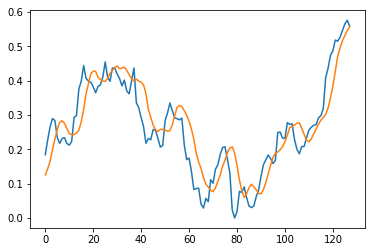

In [49]:
plt.plot(generator[0][1])
plt.plot(model.predict(generator[0][0]))